Type of summarization
image.png
An Extractive summarization method consists of selecting important sentences, paragraphs etc. from the original document and concatenating them into shorter form.
An Abstractive summarization is an understanding of the main concepts in a document and then express those concepts in clear natural language.
The Domain-specific summarization techniques utilize the available knowledge specific to the domain of text. For example, automatic summarization research on medical text generally attempts to utilize the various sources of codified medical knowledge and ontologies.
The Generic summarization focuses on obtaining a generic summary or abstract of the collection of documents, or sets of images, or videos, news stories etc.
TheQuery-based summarization, sometimes called query-relevant summarization, summarizes objects specific to a query.
The Multi-document summarization is an automatic procedure aimed at extraction of information from multiple texts written about the same topic. Resulting summary report allows individual users, such as professional information 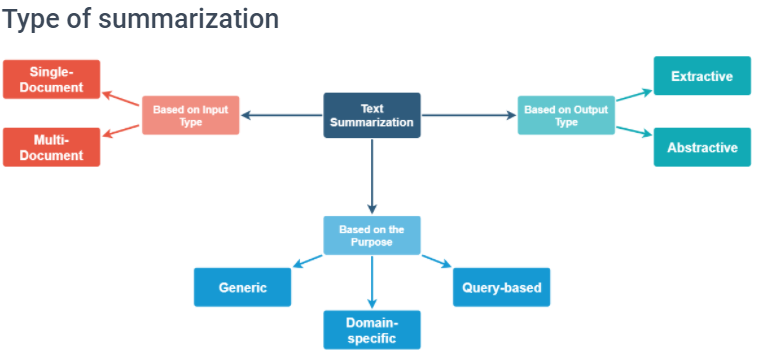consumers, to quickly familiarize themselves with information contained in a large cluster of documents.
The Single-document summarization generates a summary from a single source document.
How to do text summarization
Text cleaning
Sentence Tokenization
Word tokenization
Word-frequency table
Summarization

How to do text summarization

1.   Text cleaning
2.   Sentence tokenization
3.   Word tokenization
4.   Word frequency table
5.   Summarization


In [1]:
text = """
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.
"""

In [23]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [5]:
stopwords = list(STOP_WORDS)

In [6]:
stopwords

['back',
 'could',
 'beside',
 'through',
 'however',
 'many',
 'move',
 'this',
 'rather',
 'besides',
 'four',
 'either',
 'serious',
 'you',
 'what',
 'using',
 'per',
 'amongst',
 'eight',
 'thereby',
 'onto',
 'five',
 'forty',
 'make',
 'nor',
 'thereupon',
 'still',
 'n‘t',
 'in',
 'anyhow',
 'throughout',
 'whole',
 '’re',
 'whither',
 'for',
 'mostly',
 'done',
 '‘m',
 'ca',
 'once',
 'mine',
 'more',
 'go',
 'fifteen',
 'himself',
 'at',
 'two',
 'otherwise',
 'their',
 '’m',
 'formerly',
 'ourselves',
 'call',
 'did',
 'hereupon',
 '‘d',
 '’d',
 'is',
 'some',
 'yours',
 'every',
 'the',
 'please',
 'last',
 'elsewhere',
 'across',
 'almost',
 'whereas',
 'since',
 'such',
 'then',
 'my',
 'whenever',
 'full',
 're',
 'within',
 'anything',
 'became',
 'less',
 'its',
 'upon',
 'everyone',
 'whence',
 'herself',
 'before',
 "'re",
 'take',
 'why',
 'front',
 'there',
 'have',
 "'m",
 '‘ve',
 'whoever',
 'we',
 'so',
 'itself',
 'seemed',
 'may',
 'enough',
 'together',
 'do'

In [7]:
nlp = spacy.load('en_core_web_sm')

In [8]:
doc = nlp(text)

In [10]:
tokens = [token.text for token in doc]

In [11]:
tokens

['\n',
 'There',
 'are',
 'broadly',
 'two',
 'types',
 'of',
 'extractive',
 'summarization',
 'tasks',
 'depending',
 'on',
 'what',
 'the',
 'summarization',
 'program',
 'focuses',
 'on',
 '.',
 'The',
 'first',
 'is',
 'generic',
 'summarization',
 ',',
 'which',
 'focuses',
 'on',
 'obtaining',
 'a',
 'generic',
 'summary',
 'or',
 'abstract',
 'of',
 'the',
 'collection',
 '(',
 'whether',
 'documents',
 ',',
 'or',
 'sets',
 'of',
 'images',
 ',',
 'or',
 'videos',
 ',',
 'news',
 'stories',
 'etc',
 '.',
 ')',
 '.',
 'The',
 'second',
 'is',
 'query',
 'relevant',
 'summarization',
 ',',
 'sometimes',
 'called',
 'query',
 '-',
 'based',
 'summarization',
 ',',
 'which',
 'summarizes',
 'objects',
 'specific',
 'to',
 'a',
 'query',
 '.',
 'Summarization',
 'systems',
 'are',
 'able',
 'to',
 'create',
 'both',
 'query',
 'relevant',
 'text',
 'summaries',
 'and',
 'generic',
 'machine',
 '-',
 'generated',
 'summaries',
 'depending',
 'on',
 'what',
 'the',
 'user',
 'needs',

In [12]:
punctuation = punctuation + '\n'

In [13]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [14]:
word_frequencies

{'Image': 1,
 'Imagine': 1,
 'Similarly': 1,
 'Summarization': 1,
 'Video': 1,
 'able': 1,
 'abstract': 2,
 'actions': 1,
 'activity': 1,
 'application': 2,
 'applications': 1,
 'articles': 3,
 'attempts': 1,
 'automatic': 1,
 'automatically': 3,
 'based': 1,
 'boring': 2,
 'broadly': 1,
 'called': 2,
 'captured': 1,
 'cluster': 1,
 'collection': 3,
 'concisely': 1,
 'consists': 1,
 'consumer': 1,
 'context': 1,
 'create': 1,
 'creates': 1,
 'depending': 2,
 'document': 4,
 'documents': 2,
 'domain': 1,
 'etc': 1,
 'example': 3,
 'exploration': 1,
 'extract': 1,
 'extractive': 1,
 'focuses': 2,
 'frames': 1,
 'generated': 1,
 'generating': 1,
 'generic': 3,
 'given': 2,
 'ignoring': 1,
 'image': 1,
 'images': 3,
 'images.[3': 1,
 'important': 1,
 'interested': 1,
 'larger': 1,
 'latest': 1,
 'long': 1,
 'machine': 1,
 'multi': 1,
 'multiple': 1,
 'needs': 1,
 'news': 4,
 'objects': 1,
 'obtaining': 1,
 'personal': 1,
 'problem': 2,
 'produce': 1,
 'program': 1,
 'pulls': 1,
 'query': 4

In [15]:
max_frequency = max(word_frequencies.values())

In [16]:
max_frequency

11

We will divide each frequency value in word_frequencies with the max_frequency to normalize the frequencies.

In [17]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency

print(word_frequencies)

{'broadly': 0.09090909090909091, 'types': 0.09090909090909091, 'extractive': 0.09090909090909091, 'summarization': 1.0, 'tasks': 0.09090909090909091, 'depending': 0.18181818181818182, 'program': 0.09090909090909091, 'focuses': 0.18181818181818182, 'generic': 0.2727272727272727, 'obtaining': 0.09090909090909091, 'summary': 0.36363636363636365, 'abstract': 0.18181818181818182, 'collection': 0.2727272727272727, 'documents': 0.18181818181818182, 'sets': 0.09090909090909091, 'images': 0.2727272727272727, 'videos': 0.2727272727272727, 'news': 0.36363636363636365, 'stories': 0.09090909090909091, 'etc': 0.09090909090909091, 'second': 0.09090909090909091, 'query': 0.36363636363636365, 'relevant': 0.18181818181818182, 'called': 0.18181818181818182, 'based': 0.09090909090909091, 'summarizes': 0.09090909090909091, 'objects': 0.09090909090909091, 'specific': 0.09090909090909091, 'Summarization': 0.09090909090909091, 'systems': 0.09090909090909091, 'able': 0.09090909090909091, 'create': 0.0909090909

Now we will do sentence tokenization. The entire text is divided into sentences

In [18]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on., The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.)., The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query., Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
, An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document., Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic)., This problem is called multi-document summarization., A related application 

Now we will calculate the sentence scores. The sentence score for a particular sentence is the sum of the normalized frequencies of the words in that sentence. All the sentences will be stored with their score in the dictionary sentence_scores.

In [21]:
sentence_score = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_score.keys():
        sentence_score[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_score[sent] += word_frequencies[word.text.lower()]

In [22]:
sentence_score

{
 There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.: 2.818181818181818,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).: 3.9999999999999987,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.: 3.909090909090909,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.: 3.09090909090909,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.: 3.9999999999999996,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of artic

Now we are going to select 30% of the sentences having the largest scores. For this we are going to import nlargest from heapq.

In [25]:
select_length = int(len(sentence_tokens)*0.3)
select_length # We want the length of summary to be 30% of the original length which is 4. Hence the summary will have 4 sentences

4

nlargest() will return a list with the select_length largest elements i.e. 4 largest elements from sentence_scores. key = sentence_scores.get specifies a function of one argument that is used to extract a comparison key from each element in sentence_scores.

In [26]:
summary = nlargest(select_length, sentence_score, key = sentence_score.get)

In [27]:
summary

[An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.]

Now we will combine this sentence together and make final string which contains the summary.

In [28]:
final_summary = [word.text for word in summary]

In [29]:
final_summary

['An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.',
 'The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).',
 'The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.',
 'Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.\n']

In [30]:
summary = ' '.join(final_summary)

In [31]:
summary

'An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.\n'

In [32]:
len(text)

1869

In [33]:
len(summary)

605